# 📈 Series de Tiempo con Pandas
---

## Librerias
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Set
---

In [3]:
ypf = pd.read_csv("YPF.csv", skiprows=2, sep=";")
ypf.head()

,Fecha Cotización,Apertura,Máximo,Mínimo,Cierre,Cierre ajustado,Volumen Monto,Volumen Nominal
0,06/26/2020,619.00,622.95,600.00,608.85,608.85,"64,246,839.75","104,830.00"
1,06/25/2020,605.05,625.00,600.15,618.45,618.45,"62,791,109.15","102,732.00"
2,06/24/2020,608.95,611.00,591.00,597.90,597.90,"66,405,588.45","110,467.00"
3,06/23/2020,613.05,624.90,608.65,611.10,611.10,"125,013,430.75","202,079.00"
4,06/22/2020,618.00,618.00,588.00,608.65,608.65,"207,277,304.60","343,731.00"


##  Date Time Object
---

In [4]:
ypf["Fecha Cotización"]

0       06/26/2020
1       06/25/2020
2       06/24/2020
3       06/23/2020
4       06/22/2020
           ...    
4592     12/7/2001
4593     12/6/2001
4594     12/5/2001
4595     12/4/2001
4596     12/3/2001
Name: Fecha Cotización, Length: 4597, dtype: object

Es importante usar el tipo de objeto **DatTime**. 

Para esto  usamos la funcion **.to_datetime()**

In [11]:
pd.to_datetime(ypf["Fecha Cotización"], format="%m/%d/%Y")

0      2020-06-26
1      2020-06-25
2      2020-06-24
3      2020-06-23
4      2020-06-22
          ...    
4592   2001-12-07
4593   2001-12-06
4594   2001-12-05
4595   2001-12-04
4596   2001-12-03
Name: Fecha Cotización, Length: 4597, dtype: datetime64[ns]

Pandas trata de inferir el formato de la Serie, pero puede fallar. Se puede entonces espceificar manualmente con el parámetro **format=**

- [info sobre códgio de strings](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [6]:
ypf["Fecha Cotización"]

0       06/26/2020
1       06/25/2020
2       06/24/2020
3       06/23/2020
4       06/22/2020
           ...    
4592     12/7/2001
4593     12/6/2001
4594     12/5/2001
4595     12/4/2001
4596     12/3/2001
Name: Fecha Cotización, Length: 4597, dtype: object

##  Método Transformar Series de Tiempo
---



In [14]:
ypf = pd.read_csv("YPF.csv", skiprows=2, sep=";", index_col="Fecha Cotización", parse_dates=True)

In [15]:
ypf.index

DatetimeIndex(['2020-06-26', '2020-06-25', '2020-06-24', '2020-06-23',
               '2020-06-22', '2020-06-19', '2020-06-18', '2020-06-17',
               '2020-06-16', '2020-06-12',
               ...
               '2001-12-14', '2001-12-13', '2001-12-12', '2001-12-11',
               '2001-12-10', '2001-12-07', '2001-12-06', '2001-12-05',
               '2001-12-04', '2001-12-03'],
              dtype='datetime64[ns]', name='Fecha Cotización', length=4597, freq=None)

## Reoredenando en base al ínidice
---

In [20]:
ypf = ypf.sort_index()
ypf

,Apertura,Máximo,Mínimo,Cierre,Cierre ajustado,Volumen Monto,Volumen Nominal
Fecha Cotización,,,,,,,
2001-12-03,15.50,16.00,15.50,16.00,0.00,0.00,0.00
2001-12-04,16.00,16.50,16.00,16.50,0.00,"9,567.00",585.00
2001-12-05,17.00,18.00,17.00,18.00,0.00,"6,073.00",349.00
2001-12-06,18.00,19.00,17.00,19.00,0.00,"491,641.00","28,568.00"
2001-12-07,19.50,20.90,19.50,20.90,0.00,"249,645.00","12,131.00"
...,...,...,...,...,...,...,...
2020-06-22,618.00,618.00,588.00,608.65,608.65,"207,277,304.60","343,731.00"
2020-06-23,613.05,624.90,608.65,611.10,611.10,"125,013,430.75","202,079.00"
2020-06-24,608.95,611.00,591.00,597.90,597.90,"66,405,588.45","110,467.00"


## El group by de Series de Tiempo 

Rule parámetro [Offsets signficado](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [21]:
media_anual =ypf.resample(rule='A').mean() #anual
media_anual.head()

,Apertura,Máximo,Mínimo,Cierre,Cierre ajustado
Fecha Cotización,,,,,
2001-12-31,20.466667,21.319048,20.333333,21.266667,0.0
2002-12-31,43.049617,43.903448,42.732950,43.736782,0.0
2003-12-31,71.129310,71.835632,70.729502,71.505556,0.0
2004-12-31,117.298473,118.081107,116.618702,117.400382,0.0
2005-12-31,164.499231,165.890385,162.999038,164.457115,0.0


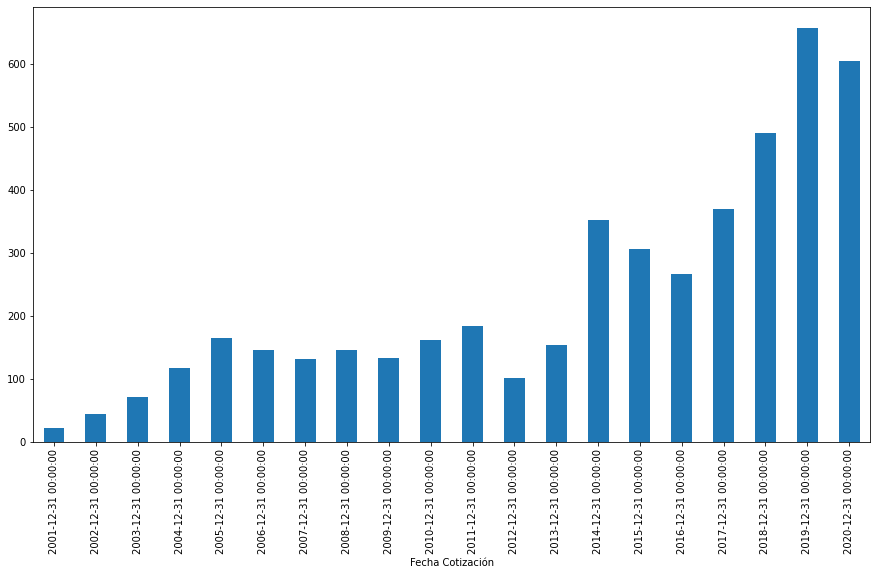

In [22]:
plt.figure(figsize=(15,8))
media_anual["Cierre"].plot(kind="bar")

In [23]:
ypf.resample(rule='M').sum() #mensual

,Apertura,Máximo,Mínimo,Cierre,Cierre ajustado
Fecha Cotización,,,,,
2001-12-31,429.80,447.70,427.00,446.60,0.00
2002-01-31,761.55,784.10,760.95,783.70,0.00
2002-02-28,860.75,868.55,857.70,866.10,0.00
2002-03-31,975.60,996.20,971.85,996.15,0.00
2002-04-30,1226.50,1258.00,1217.25,1258.00,0.00
...,...,...,...,...,...
2020-02-29,14063.30,14264.85,13761.85,13976.15,13976.15
2020-03-31,8686.95,8993.90,8121.70,8451.30,8451.30
2020-04-30,7959.95,8276.45,7680.05,8030.45,8030.45


In [24]:
ypf.head()

,Apertura,Máximo,Mínimo,Cierre,Cierre ajustado,Volumen Monto,Volumen Nominal
Fecha Cotización,,,,,,,
2001-12-03,15.5,16.0,15.5,16.0,0.0,0.00,0.00
2001-12-04,16.0,16.5,16.0,16.5,0.0,"9,567.00",585.00
2001-12-05,17.0,18.0,17.0,18.0,0.0,"6,073.00",349.00
2001-12-06,18.0,19.0,17.0,19.0,0.0,"491,641.00","28,568.00"
2001-12-07,19.5,20.9,19.5,20.9,0.0,"249,645.00","12,131.00"


In [25]:
ypf.shift(1)

,Apertura,Máximo,Mínimo,Cierre,Cierre ajustado,Volumen Monto,Volumen Nominal
Fecha Cotización,,,,,,,
2001-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-04,15.50,16.0,15.50,16.00,0.00,0.00,0.00
2001-12-05,16.00,16.5,16.00,16.50,0.00,"9,567.00",585.00
2001-12-06,17.00,18.0,17.00,18.00,0.00,"6,073.00",349.00
2001-12-07,18.00,19.0,17.00,19.00,0.00,"491,641.00","28,568.00"
...,...,...,...,...,...,...,...
2020-06-22,591.05,633.0,591.05,621.85,621.85,"158,440,310.75","257,290.00"
2020-06-23,618.00,618.0,588.00,608.65,608.65,"207,277,304.60","343,731.00"
2020-06-24,613.05,624.9,608.65,611.10,611.10,"125,013,430.75","202,079.00"


## Media Movíl 

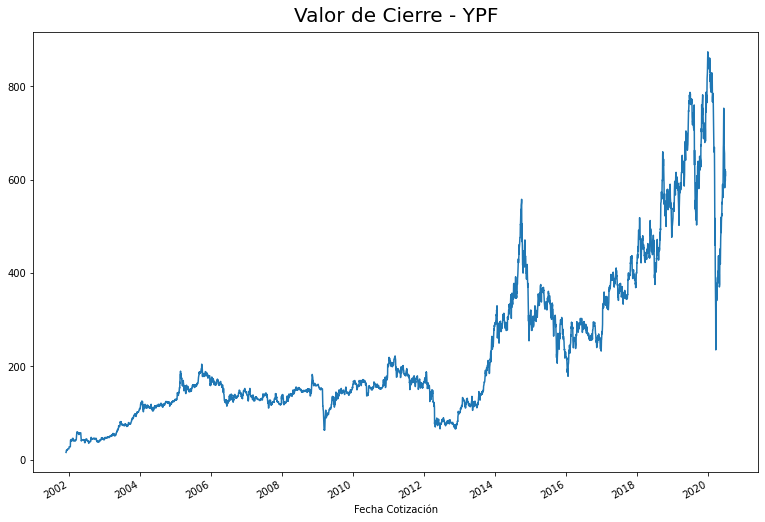

In [26]:
plt.figure(figsize=(13,9))
ypf["Cierre"].plot(kind="line")
plt.title("Valor de Cierre - YPF", pad=10, fontdict={'fontsize':20});

In [27]:
media_movil = ypf.rolling(window=7).mean()
media_movil.head(8)

,Apertura,Máximo,Mínimo,Cierre,Cierre ajustado
Fecha Cotización,,,,,
2001-12-03,NaN,NaN,NaN,NaN,NaN
2001-12-04,NaN,NaN,NaN,NaN,NaN
2001-12-05,NaN,NaN,NaN,NaN,NaN
2001-12-06,NaN,NaN,NaN,NaN,NaN
2001-12-07,NaN,NaN,NaN,NaN,NaN
2001-12-10,NaN,NaN,NaN,NaN,NaN
2001-12-11,18.071429,18.700000,17.842857,18.700000,0.0
2001-12-12,18.714286,19.271429,18.485714,19.271429,0.0


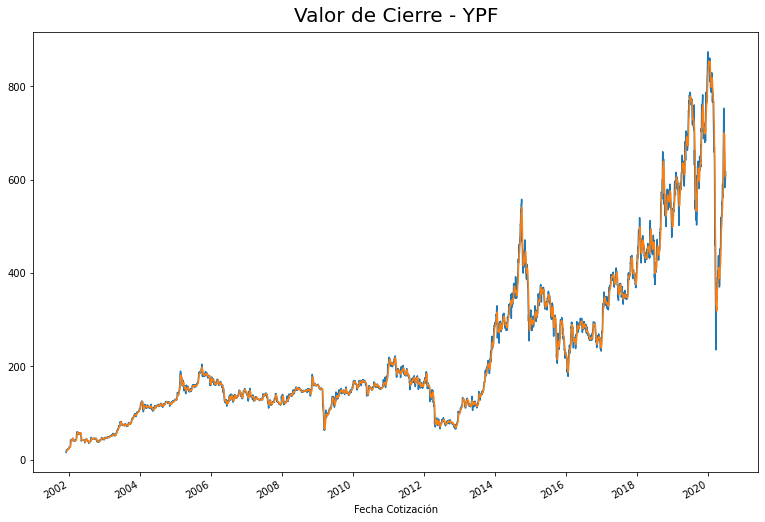

In [28]:
plt.figure(figsize=(13,9))
ypf["Cierre"].plot(kind="line")
media_movil["Cierre"].plot(kind="line")
plt.title("Valor de Cierre - YPF", pad=10, fontdict={'fontsize':20});

In [29]:
media_movil = ypf.rolling(window=30).mean()
media_movil.head(35)

,Apertura,Máximo,Mínimo,Cierre,Cierre ajustado
Fecha Cotización,,,,,
2001-12-03,NaN,NaN,NaN,NaN,NaN
2001-12-04,NaN,NaN,NaN,NaN,NaN
2001-12-05,NaN,NaN,NaN,NaN,NaN
2001-12-06,NaN,NaN,NaN,NaN,NaN
2001-12-07,NaN,NaN,NaN,NaN,NaN
2001-12-10,NaN,NaN,NaN,NaN,NaN
2001-12-11,NaN,NaN,NaN,NaN,NaN
2001-12-12,NaN,NaN,NaN,NaN,NaN
2001-12-13,NaN,NaN,NaN,NaN,NaN


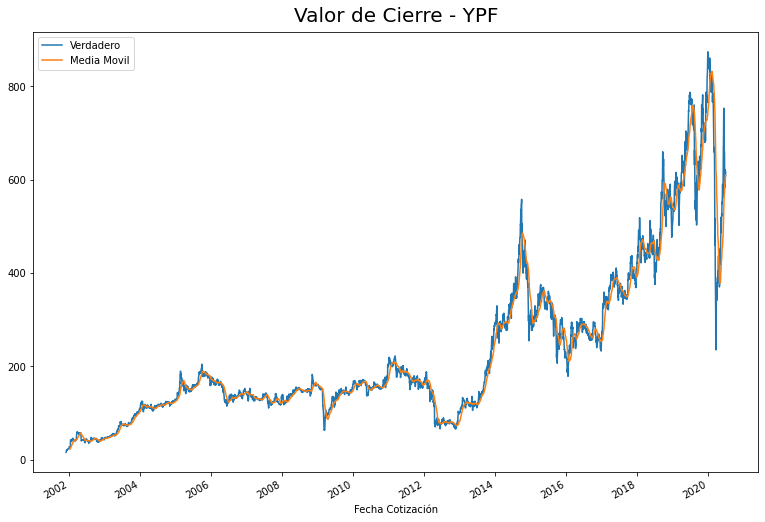

In [30]:
plt.figure(figsize=(13,9))
ypf["Cierre"].plot(kind="line", label="Verdadero")
media_movil["Cierre"].plot(kind="line", label="Media Movil")
plt.title("Valor de Cierre - YPF", pad=10, fontdict={'fontsize':20});
plt.legend()

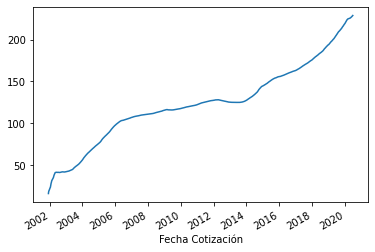

In [31]:
ypf["Cierre"].expanding().mean().plot(kind="line")


## Subselección  de TS
---



In [32]:
ypf["Cierre"]["2005-11-25": "2006-11-25"]

Fecha Cotización
2005-11-25    184.0
2005-11-28    180.0
2005-11-29    177.5
2005-11-30    176.0
2005-12-01    175.0
              ...  
2006-11-20    132.0
2006-11-21    131.0
2006-11-22    140.0
2006-11-23    140.0
2006-11-24    140.0
Name: Cierre, Length: 256, dtype: float64

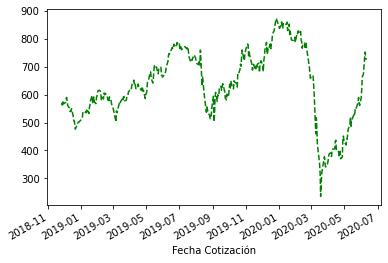

In [33]:
ypf.loc["2018-11-25": "2020-06-10", "Cierre" ].plot(kind="line", ls="--", c="green")

## Gráfico con plotly

In [1]:
import plotly.express as px

fig = px.line(ypf, x=ypf.index , y="Cierre", title='Cierre 2002-2020 (YPF)' )
fig = px.line(media_movil, x=media_movil.index , y="Cierre", title='Cierre 2002-2020 (YPF)' )

fig.show()

NameError: name 'ypf' is not defined

In [2]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter( x=ypf.index , y=ypf["Cierre"] ))
fig.add_trace(go.Scatter( x=media_movil.index , y=media_movil["Cierre"] ))
fig.show()

NameError: name 'ypf' is not defined